# Consolidação do Conteúdo - Aprendizado de Máquina



***

# Dataset

O tema do dataset escolhido é Pokémon. Os Pokémons são mundialmente conhecidos e são destacados por cada criatura ter suas características únicas que as definem. O dataset escolhido para esse trabalho conta com uma lista de 13 características e 1072 Pokémons.

As características são:
- __Number__ (_Número_): É o ID de cada Pokémon.
- __Name__ (_Nome_): É o nome de cada Pokémon.
- __Type 1__ (_Tipo 1_): É o primeiro tipo do Pokémon. Todo Pokémon têm o primeiro tipo.
- __Type 2__ (_Tipo 2_): É o segundo tipo do Pokémon. Alguns Pokémon não têm segundo tipo.
- __Total__ (_Total_): Soma de todas as estatísticas (Ataque, Defesa, Sp. Ataque, Sp. Defesa e Speed). Este valor é muito importante para determinar se o Pokémon é forte ou não.
- __Attack__ (_Ataque_): Valor da força física do Pokémon.
- __Defense__ (_Defesa_): Valor da resistência física do Pokémon.
- __SP Attack__ (_Ataque Especial_): Valor da força mágica do Pokémon.
- __SP Defense__ (_Defesa Especial_): Valor da resistência mágica do Pokémon.
- __Speed__ (_Velocidade_): Valor da velocidade do Pokémon, esse valor determina qual Pokémon ataca primeiro.
- __Generation__ (_Geração_): A geração de jogos em que o Pokémon teve sua primeira introdução.
- __Legendary__ (_Lendário_): Alguns Pokémons são mais raros que outros, e eles são chamadas de "lendários".

<br>
<br>

Como pode ser observado pelos dados fornecidos pelo dataset, e pela experiência própria com a franquia do autor deste arquivo de código  com a franquia Pokémon, não é possível afirmar com 100% de acertividade que um Pokémon é do tipo Água, Fogo ou qualquer outro tipo pelas suas estatísticas, sua geração ou se é lendário ou não. Na página do dataset, o próprio autor comenta:


>O tipo de um Pokémon não pode ser inferido apenas pelo seu Ataque e Defesa. Valeria a pena descobrir quais duas variáveis ​​podem definir o tipo de um pokémon, se houver. Duas variáveis ​​podem ser plotadas em um espaço 2D e usadas como exemplo para aprendizado de máquina. Isso pode significar a criação de um exemplo visual que qualquer turma geek de aprendizado de máquina adoraria.

<br>

Entretanto, os Pokémons que pertencem a um certo tipo seguem uma tendência. Segundo o Bulbapedia, um site expecializado em informações da franquia Pokémon, o tipo eletric (elétrico) tem em média 85,94 de velocidade entre todos os Pokémon desse tipo, em contra-partida os do tipo ground (terra) tem somente 61,13 de velocidade. Com essa informações, é possível prever que a probabilidade de um Pokémon que tem 90 de velocidade é maior de ser do tipo elétrico do que terra. Pontanto essa database pode ser uma ótima escolha para testar os algoritmos de aprendizado de máquina.

In [121]:
# Todos os imports global necessários para este arquivo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
data = pd.read_csv('Pokemon.csv')

In [123]:
for column in data.columns:
  print(f'{column:>12}: {len(set(data[column])):4} {data[column].dtype}')

      number:  898 int64
        name: 1072 object
       type1:   20 object
       type2:   19 object
       total:  219 int64
          hp:  103 int64
      attack:  123 int64
     defense:  114 int64
   sp_attack:  119 int64
  sp_defense:  107 int64
       speed:  127 int64
  generation:    9 int64
   legendary:    2 bool


***

# Funções de Plot

In [96]:
def plotTwoColumns(col1, col2):
  plt.xlabel(f"{col1.name}")
  plt.ylabel(f"{col2.name}")
  plt.scatter(col1, col2)
  plt.show()

***

# Regressão



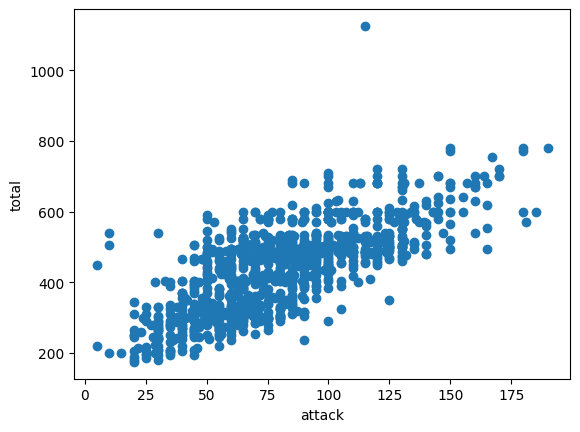

In [118]:
x = data['attack']
y = data['total']

x_t = x.values.reshape(-1,1)
y_t = y.values.reshape(-1,1)


plotTwoColumns(x, y)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

modelo = LinearRegression()
modelo.fit(x_t, y_t)
ypred = modelo.predict(x_t)
mean_absolute_error(y_t, ypred)

65.99654244702673

6778.700494132923


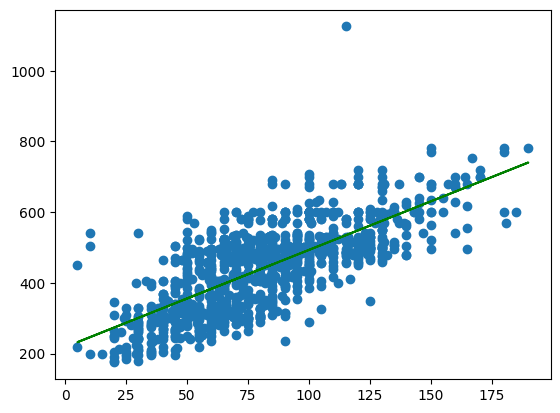

In [117]:
class regressao_linear:

  def __init__(self):
    self.w = np.zeros((2,1))
    self.wh = []

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias,X),axis=1)
    return X_b
  
  def fit(self,X,y):
    X_b = self.addBias(X)
    for _ in range (20):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
      self.w = self.w - 0.1 * ajuste
      ypred = self.predict(X)
      mse = mean_squared_error(y, ypred)
      self.wh.append([self.w[0,0], self.w[1,0], mse])

  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.w)
    return y
  

plt.scatter(x_t, y_t)
modelo.fit(x_t, y_t)
ypred = modelo.predict(x_t)
print(mean_squared_error(y_t,ypred))
plt.plot(x_t, ypred, 'g')

plt.show()